In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# data generation
np.random.seed(1234)

In [61]:
n = 1000
alpha = 11
s = np.array([alpha, 1])
X = np.diag(s).dot(np.random.rand(2,n))

In [62]:
H = np.eye(n) - np.ones((n,n))/n

In [63]:
def custom_sdist(X):
    XX = np.dot(X.T, X)
    pdists = np.outer(np.diag(XX), np.ones(XX.shape[1]).T) + np.outer(np.ones(XX.shape[0]), np.diag(XX).T) - 2*XX
    return pdists

In [64]:
sigma = 50

In [65]:
def K(X, sig):
    KK = np.exp(-custom_sdist(X)/(2 * sig**2))
    return KK

In [66]:
k = 2

In [67]:
KK = K(X, sigma)
KK = H.dot(KK).dot(H)
w,v = np.linalg.eig(KK)
# print(w[:4])
# print(np.max(w))
w_sort = np.argsort(w)[::-1][:k]
wk = np.diag(np.sqrt(w[w_sort]))
# print(w[w_sort])
vk = v[:,w_sort]
Y = wk.dot(vk.T)

/home/eddiesyn/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


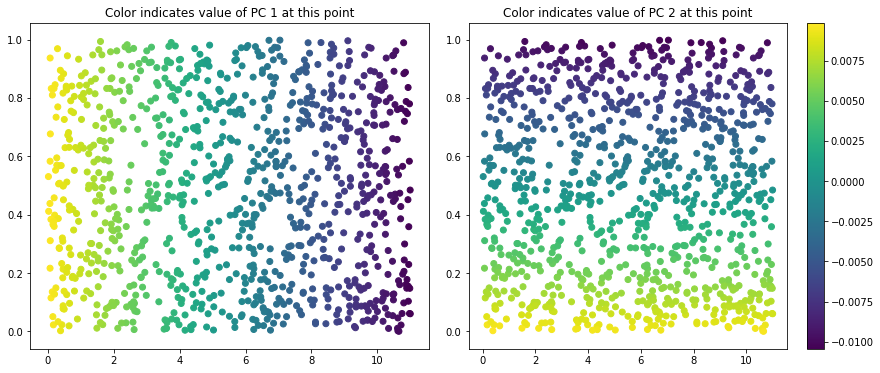

In [68]:
fig, axs = plt.subplots(1,2,figsize=(15,6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.5, wspace=.1)
axs = axs.ravel()
for ip in range(k):
    im = axs[ip].scatter(X[0,:], X[1,:], c=Y[ip,:])
    axs[ip].set_title('Color indicates value of PC {} at this point'.format(ip+1))
    
fig.colorbar(im)
plt.show()

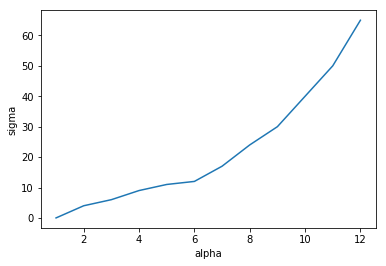

In [69]:
alphas = [1,2,3,4,5,6,7,8,9,10,11,12]
sigmas = [0,4,6,9,11,12,17,24,30,40,50,65]
plt.figure()
plt.plot(alphas, sigmas)
plt.xlabel('alpha')
plt.ylabel('sigma')

plt.show()

We choose the $\sigma$ with eyes by varying $\alpha$ from 2 to 12. For $\alpha$ = 1, there is no $\sigma$ that can make it work, so we assign it to 0.